In [19]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a62545b7d843420e973f1403df14c69e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ua2RCgSZmj1iLmfXyiKIGPx_yRekWr4hhQoGcuy1e8ih',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a62545b7d843420e973f1403df14c69e.get_object(Bucket='capstone-donotdelete-pr-bycj6mhs6pkfvj',Key='Sydney_Suburb_complete_dataset_final.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome,Unnamed: 8
0,0,South,Alexandria,-33.9080,151.1903,8262,Sydney,2421,NaN
1,1,West,Annandale,-33.8814,151.1707,9451,Sydney,2337,NaN
2,2,North,Barangaroo,-33.8638,151.2022,189,Sydney,3661,NaN
3,3,West,Beaconsfield,-33.9110,151.1999,987,Sydney,2330,NaN
4,4,West,Camperdown,-33.8862,151.1791,10341,Sydney,1796,NaN


In [4]:
df_data_1.drop('Unnamed: 0',axis=1,inplace=True)


In [5]:
df_data_1.drop('Unnamed: 8',axis=1,inplace=True)


In [6]:
df_data_1.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,South,Alexandria,-33.9080,151.1903,8262,Sydney,2421
1,West,Annandale,-33.8814,151.1707,9451,Sydney,2337
2,North,Barangaroo,-33.8638,151.2022,189,Sydney,3661
3,West,Beaconsfield,-33.9110,151.1999,987,Sydney,2330
4,West,Camperdown,-33.8862,151.1791,10341,Sydney,1796


In [7]:
Sydney_population = pd.DataFrame(df_data_1[['Borough','Neighborhoods','Population']])


In [8]:
Sydney_population.head()

,Borough,Neighborhoods,Population
0,South,Alexandria,8262
1,West,Annandale,9451
2,North,Barangaroo,189
3,West,Beaconsfield,987
4,West,Camperdown,10341


In [9]:
Sydney_income = pd.DataFrame(df_data_1[['Borough','Neighborhoods','AverageIncome']])


In [10]:
Sydney_income.head()

,Borough,Neighborhoods,AverageIncome
0,South,Alexandria,2421
1,West,Annandale,2337
2,North,Barangaroo,3661
3,West,Beaconsfield,2330
4,West,Camperdown,1796


In [11]:
Sydney_latitude = df_data_1['Latitude'].mean()
Sydney_longitude = df_data_1['Longitude'].mean()
print("Latitude and Longitude of Sydney are : ",Sydney_latitude,Sydney_longitude)

Latitude and Longitude of Sydney are :  -33.88583333333333 151.20300303030305


In [12]:
CLIENT_ID = 'N0PUV4D3JDM4DS201F3RSRE03VR3R4DD0KM540GRFRKXS5DT'
CLIENT_SECRET = 'MVK1JHCTBNPMMHO3TQBELZKZX2IT0CU3GJEWOV0U4QV0ZYNB'
VERSION = '20180606'
LIMIT = 150

In [13]:
unique_boroughs_of_Sydney = df_data_1['Borough'].unique().tolist()


In [14]:
unique_boroughs_of_Sydney

['South', 'West', 'North', 'East', 'Central']

In [20]:
borough_colors ={}
for i in unique_boroughs_of_Sydney:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [21]:
borough_colors

{'South': '#8FCF35',
 'West': '#C52A47',
 'North': '#9D84DB',
 'East': '#CE5548',
 'Central': '#3A0AE0'}

In [22]:
Sydney_map = folium.Map(location=[Sydney_latitude,Sydney_longitude],zoom_start=12,control_scale=True)


In [23]:
for lat,lng,boro,nei in zip(df_data_1['Latitude'],
                           df_data_1['Longitude'],
                           df_data_1['Borough'],
                           df_data_1['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(Sydney_map)

In [24]:
Sydney_map

# Exploring Sydney Neighborhoods using FourSquare API


In [25]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [26]:
Sydney_venues = getNearbyVenues(names=df_data_1['Neighborhoods'],latitudes=df_data_1['Latitude'],longitudes=df_data_1['Longitude'],boro=df_data_1['Borough'])

Fetching venues for :  Alexandria
Fetching venues for :  Annandale
Fetching venues for :  Barangaroo
Fetching venues for :  Beaconsfield
Fetching venues for :  Camperdown
Fetching venues for :  Centennial Park
Fetching venues for :  Chippendale
Fetching venues for :  Darlinghurst
Fetching venues for :  Darlington
Fetching venues for :  Dawes Point
Fetching venues for :  Elizabeth Bay
Fetching venues for :  Erskineville
Fetching venues for :  Eveleigh
Fetching venues for :  Forest Lodge
Fetching venues for :  Glebe
Fetching venues for :  Haymarket
Fetching venues for :  Millers Point
Fetching venues for :  Moore Park
Fetching venues for :  Newtown
Fetching venues for :  Paddington
Fetching venues for :  Potts Point
Fetching venues for :  Pyrmont
Fetching venues for :  The Rocks
Fetching venues for :  Rosebery
Fetching venues for :  Redfern
Fetching venues for :  Rushcutters Bay
Fetching venues for :  St Peters
Fetching venues for :  Surry Hills
Fetching venues for :  Sydney
Fetching ven

In [27]:
print("Total number of venues found in Sydney are : ",Sydney_venues.shape[0])


Total number of venues found in Sydney are :  1572


In [28]:
Sydney_venues.head(5)


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alexandria,South,-33.908,151.1903,Pino’s Vino e Cucina,-33.905480,151.190950,Italian Restaurant
1,Alexandria,South,-33.908,151.1903,La Cachette,-33.904849,151.189727,Café
2,Alexandria,South,-33.908,151.1903,Blackbird & Co,-33.906612,151.187861,Café
3,Alexandria,South,-33.908,151.1903,The Copper Mill,-33.906068,151.188426,Café
4,Alexandria,South,-33.908,151.1903,The Grounds of Alexandria,-33.910774,151.194406,Café


In [29]:
Sydney_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)


Venue Category
Café                     271
Bar                       64
Pub                       63
Hotel                     57
Coffee Shop               55
Italian Restaurant        53
Australian Restaurant     50
Thai Restaurant           41
Japanese Restaurant       36
Park                      35
Name: Neighborhood, dtype: int64

In [30]:
print("Total number of unique categories in Sydney are : ",len(Sydney_venues['Venue Category'].unique()))


Total number of unique categories in Sydney are :  196


# Getting number of venues per neighborhood


In [31]:
individual_Sydney_venue_count = Sydney_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()


In [32]:
individual_Sydney_venue_count

Borough
Borough Neighborhood            
Central Elizabeth Bay         61
        Glebe                 48
        Haymarket             64
        Millers Point         34
        Potts Point           53
        Pyrmont               95
        Redfern               30
        Rushcutters Bay       52
        Surry Hills           92
        Sydney               100
        The Rocks            100
        Ultimo                55
        Woolloomooloo        100
East    Centennial Park        9
        Darlinghurst          67
        Moore Park            25
        Paddington            43
North   Barangaroo            41
        Dawes Point           71
South   Alexandria            10
        Chippendale           82
        Erskineville          27
        Eveleigh              18
        Rosebery              12
        Waterloo              17
        Zetland               31
West    Annandale             23
        Beaconsfield          29
        Camperdown            25
        Darlington            50
        Forest Lodge          26
        Newtown               72
        St Peters             10

In [33]:
individual_Sydney_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)


In [34]:
individual_Sydney_venue_count.reset_index(inplace=True)


In [35]:
individual_Sydney_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Elizabeth Bay,61
1,Central,Glebe,48
2,Central,Haymarket,64
3,Central,Millers Point,34
4,Central,Potts Point,53
5,Central,Pyrmont,95
6,Central,Redfern,30
7,Central,Rushcutters Bay,52
8,Central,Surry Hills,92
9,Central,Sydney,100


[Text(0, 0, 'Elizabeth Bay'),
 Text(0, 0, 'Glebe'),
 Text(0, 0, 'Haymarket'),
 Text(0, 0, 'Millers Point'),
 Text(0, 0, 'Potts Point'),
 Text(0, 0, 'Pyrmont'),
 Text(0, 0, 'Redfern'),
 Text(0, 0, 'Rushcutters Bay'),
 Text(0, 0, 'Surry Hills'),
 Text(0, 0, 'Sydney'),
 Text(0, 0, 'The Rocks'),
 Text(0, 0, 'Ultimo'),
 Text(0, 0, 'Woolloomooloo'),
 Text(0, 0, 'Centennial Park'),
 Text(0, 0, 'Darlinghurst'),
 Text(0, 0, 'Moore Park'),
 Text(0, 0, 'Paddington'),
 Text(0, 0, 'Barangaroo'),
 Text(0, 0, 'Dawes Point'),
 Text(0, 0, 'Alexandria'),
 Text(0, 0, 'Chippendale'),
 Text(0, 0, 'Erskineville'),
 Text(0, 0, 'Eveleigh'),
 Text(0, 0, 'Rosebery'),
 Text(0, 0, 'Waterloo'),
 Text(0, 0, 'Zetland'),
 Text(0, 0, 'Annandale'),
 Text(0, 0, 'Beaconsfield'),
 Text(0, 0, 'Camperdown'),
 Text(0, 0, 'Darlington'),
 Text(0, 0, 'Forest Lodge'),
 Text(0, 0, 'Newtown'),
 Text(0, 0, 'St Peters')]

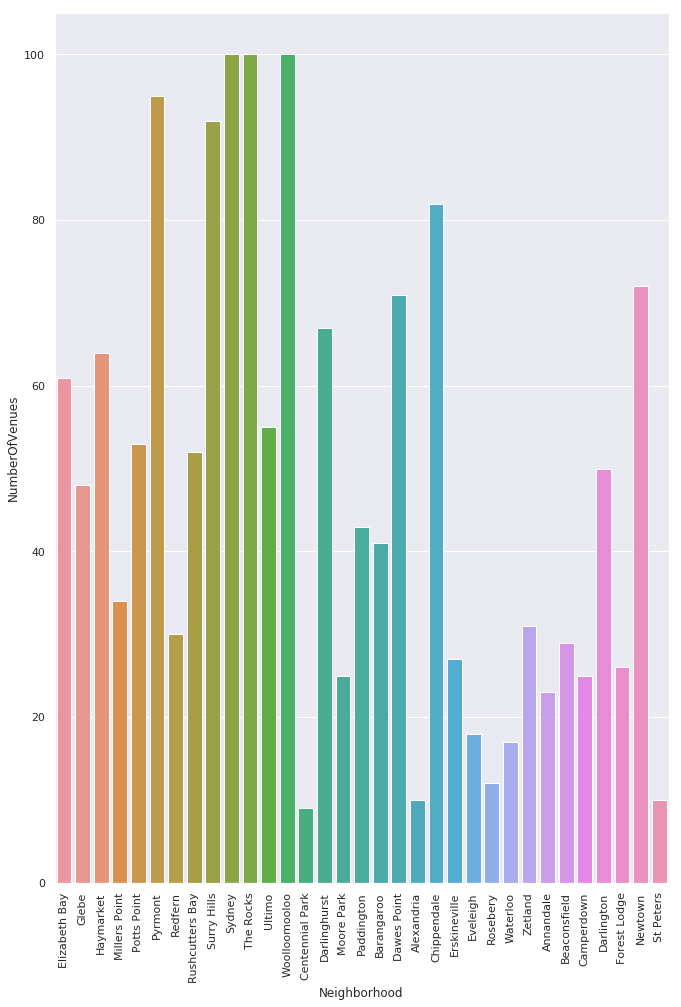

In [36]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_Sydney_venue_count)
plot.set_xticklabels(individual_Sydney_venue_count['Neighborhood'],rotation=90)


From the above graph we can see that Surry Hills, Sydney & Woollomooloo has most number of venues and soo on...



# Exploring Darlinghurst venues¶


In [37]:
Sydney_venues[Sydney_venues['Neighborhood']=='Darlinghurst']


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
219,Darlinghurst,East,-33.878,151.2204,Gelato Messina,-33.878020,151.221230,Ice Cream Shop
220,Darlinghurst,East,-33.878,151.2204,Sydney Jewish Museum,-33.878765,151.220183,History Museum
221,Darlinghurst,East,-33.878,151.2204,Eau De Vie,-33.876799,151.220942,Lounge
222,Darlinghurst,East,-33.878,151.2204,Buffalo Dining Club,-33.877431,151.221846,Italian Restaurant
223,Darlinghurst,East,-33.878,151.2204,A Brewer's Tale Cafe,-33.878800,151.219050,Café
224,Darlinghurst,East,-33.878,151.2204,Govinda's & Movie Room,-33.876578,151.221381,Indian Restaurant
225,Darlinghurst,East,-33.878,151.2204,Fable,-33.878203,151.220413,Café
226,Darlinghurst,East,-33.878,151.2204,Malabar South Indian Cuisine,-33.876299,151.221873,South Indian Restaurant
227,Darlinghurst,East,-33.878,151.2204,Una's Café & Restaurant,-33.877615,151.221717,Austrian Restaurant
228,Darlinghurst,East,-33.878,151.2204,Chapter E,-33.876140,151.221270,Café


# One hot encoding for letting us to compare different venues based on some common scale

In [38]:
Sydney_venues_onehot = pd.get_dummies(Sydney_venues[['Venue Category']])


In [39]:
Sydney_venues_onehot

,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Argentinian Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_Austrian Restaurant,Venue Category_Auto Workshop,...,Venue Category_Tram Station,Venue Category_Tunnel,Venue Category_Turkish Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Waterfront,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
Sydney_venues_onehot['Neighborhood'] = Sydney_venues['Neighborhood']
Sydney_venues_grouped = Sydney_venues_onehot.groupby('Neighborhood').mean().reset_index()
Sydney_venues_grouped

,Neighborhood,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Argentinian Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_Austrian Restaurant,...,Venue Category_Tram Station,Venue Category_Tunnel,Venue Category_Turkish Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Waterfront,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio
0,Alexandria,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,Annandale,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.043478,0.043478,0.000000,...,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,Barangaroo,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.024390,0.000000,...,0.00,0.02439,0.000000,0.000000,0.000000,0.02439,0.000000,0.000000,0.000000,0.000000
3,Beaconsfield,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,Camperdown,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,Centennial Park,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.111111,0.000000,...,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,Chippendale,0.000000,0.000000,0.000000,0.00000,0.024390,0.000000,0.000000,0.024390,0.000000,...,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.024390,0.000000,0.012195
7,Darlinghurst,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.014925,...,0.00,0.00000,0.000000,0.000000,0.044776,0.00000,0.000000,0.000000,0.000000,0.000000
8,Darlington,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.00,0.00000,0.020000,0.000000,0.000000,0.00000,0.000000,0.020000,0.000000,0.020000
9,Dawes Point,0.000000,0.000000,0.000000,0.00000,0.000000,0.014085,0.000000,0.070423,0.000000,...,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [41]:
number_of_top_venues = 5


In [42]:
for hood in Sydney_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = Sydney_venues_grouped[Sydney_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Alexandria ---------
                                  Venue  Frequency
0                   Venue Category_Café        0.5
1     Venue Category_Basketball Stadium        0.1
2     Venue Category_Italian Restaurant        0.1
3                Venue Category_Brewery        0.1
4  Venue Category_Australian Restaurant        0.1


--------- Annandale ---------
                          Venue  Frequency
0           Venue Category_Café       0.26
1           Venue Category_Park       0.09
2  Venue Category_Grocery Store       0.09
3    Venue Category_Pizza Place       0.04
4  Venue Category_Garden Center       0.04


--------- Barangaroo ---------
                         Venue  Frequency
0          Venue Category_Café       0.10
1         Venue Category_Hotel       0.07
2   Venue Category_Coffee Shop       0.05
3  Venue Category_Burger Joint       0.05
4           Venue Category_Bar       0.05


--------- Beaconsfield ---------
                                   Venue  Frequency
0

                         Venue  Frequency
0          Venue Category_Café       0.13
1   Venue Category_Coffee Shop       0.08
2           Venue Category_Bar       0.06
3  Venue Category_Cocktail Bar       0.05
4     Venue Category_Speakeasy       0.05


--------- The Rocks ---------
                                  Venue  Frequency
0                   Venue Category_Café       0.12
1                  Venue Category_Hotel       0.09
2  Venue Category_Australian Restaurant       0.07
3                    Venue Category_Pub       0.05
4           Venue Category_Cocktail Bar       0.04


--------- Ultimo ---------
                                Venue  Frequency
0                 Venue Category_Café       0.18
1          Venue Category_Coffee Shop       0.09
2                Venue Category_Hotel       0.04
3       Venue Category_Ice Cream Shop       0.04
4  Venue Category_Dumpling Restaurant       0.04


--------- Waterloo ---------
                                 Venue  Frequency
0     

Frequency of each neighborhood and its top 5 venues can be known. This is very important as we can analyze top neighborhoods with most busy restaurants



In [43]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [44]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Sydney_venues_grouped['Neighborhood']

for ind in np.arange(Sydney_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Sydney_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,Venue Category_Café,Venue Category_Grocery Store,Venue Category_Brewery,Venue Category_Italian Restaurant,Venue Category_Australian Restaurant,Venue Category_Basketball Stadium,Venue Category_Falafel Restaurant,Venue Category_Fountain,Venue Category_Food Truck,Venue Category_Food Court
1,Annandale,Venue Category_Café,Venue Category_Park,Venue Category_Grocery Store,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pub,Venue Category_Fish & Chips Shop,Venue Category_Snack Place,Venue Category_Liquor Store,Venue Category_Garden Center
2,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,Venue Category_Bowling Alley
3,Beaconsfield,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Furniture / Home Store,Venue Category_Electronics Store,Venue Category_Thai Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Sandwich Place,Venue Category_Liquor Store,Venue Category_Kebab Restaurant,Venue Category_Basketball Stadium
4,Camperdown,Venue Category_Café,Venue Category_Convenience Store,Venue Category_Baby Store,Venue Category_Climbing Gym,Venue Category_Restaurant,Venue Category_Liquor Store,Venue Category_Korean Restaurant,Venue Category_Sushi Restaurant,Venue Category_Motorcycle Shop,Venue Category_Gastropub


In [45]:
neighborhoods_venues_sorted.shape


(33, 11)

# Next challenge is to find the optimal k value for clustering and we do it using the elbow method

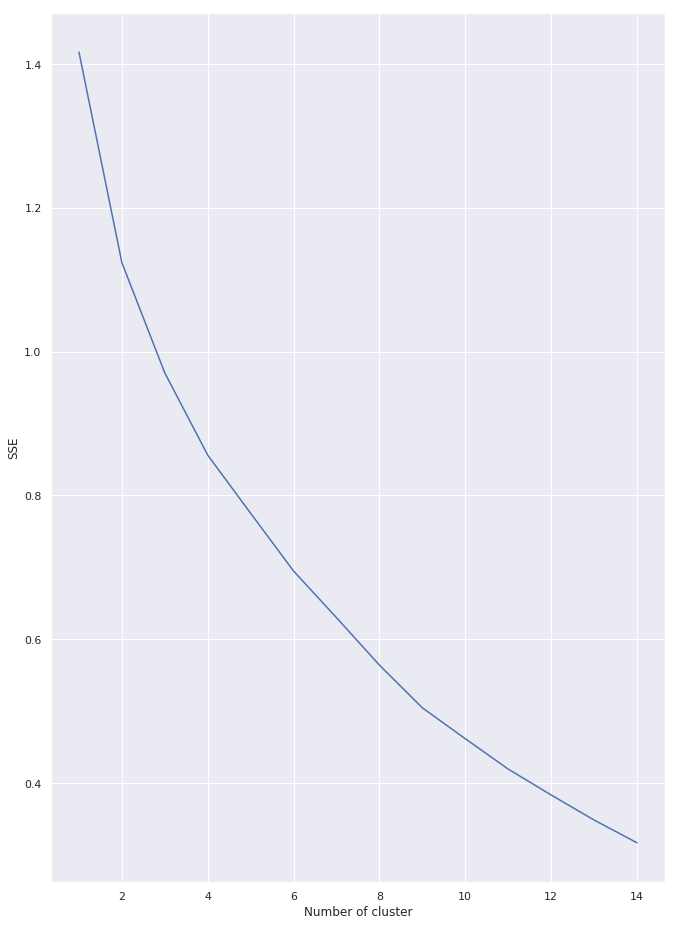

In [46]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(Sydney_venues_grouped.drop('Neighborhood',axis=1))
    Sydney_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# From the above graph, we can see the optimal value for cluster is 4.

In [47]:
kmeans = KMeans(n_clusters=4,random_state=0)


In [48]:
kmeans.fit(Sydney_venues_grouped.drop('Neighborhood',axis=1))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [49]:
Sydney_venues_grouped['Cluster'] = kmeans.labels_


In [50]:
Sydney_venues_grouped.groupby('Cluster')['Neighborhood'].count()


Cluster
0     8
1     8
2     7
3    10
Name: Neighborhood, dtype: int64

In [51]:
Sydney_venues_grouped.columns


Index(['Neighborhood', 'Venue Category_African Restaurant',
       'Venue Category_American Restaurant', 'Venue Category_Arcade',
       'Venue Category_Argentinian Restaurant', 'Venue Category_Art Gallery',
       'Venue Category_Art Museum', 'Venue Category_Asian Restaurant',
       'Venue Category_Australian Restaurant',
       'Venue Category_Austrian Restaurant',
       ...
       'Venue Category_Tunnel', 'Venue Category_Turkish Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Waterfront',
       'Venue Category_Whisky Bar', 'Venue Category_Wine Bar',
       'Venue Category_Wine Shop', 'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=198)

In [52]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Sydney_venues_grouped,on='Neighborhood')


In [53]:
neighborhoods_venues_sorted.head(4)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tunnel,Venue Category_Turkish Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Waterfront,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio,Cluster
0,Alexandria,Venue Category_Café,Venue Category_Grocery Store,Venue Category_Brewery,Venue Category_Italian Restaurant,Venue Category_Australian Restaurant,Venue Category_Basketball Stadium,Venue Category_Falafel Restaurant,Venue Category_Fountain,Venue Category_Food Truck,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2
1,Annandale,Venue Category_Café,Venue Category_Park,Venue Category_Grocery Store,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pub,Venue Category_Fish & Chips Shop,Venue Category_Snack Place,Venue Category_Liquor Store,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2
2,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,0.02439,0.0,0.0,0.0,0.02439,0.0,0.0,0.0,0.0,3
3,Beaconsfield,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Furniture / Home Store,Venue Category_Electronics Store,Venue Category_Thai Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Sandwich Place,Venue Category_Liquor Store,Venue Category_Kebab Restaurant,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3


In [54]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Sydney_venues,on='Neighborhood')

In [55]:
# create map
map_clusters = folium.Map(location=[Sydney_latitude, Sydney_longitude], zoom_start=11)

In [56]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [58]:
map_clusters

# Finding similar locations based on user input (recommending location)

We need to analyze factors such as population and Income to recommend.


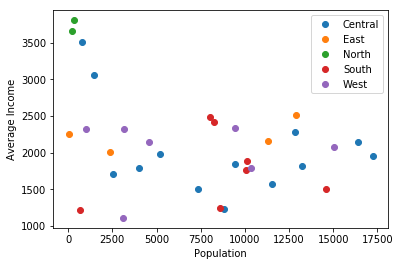

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

groups = df_data_1.groupby("Borough")
for name, group in groups:
    plt.plot(group["Population"], group["AverageIncome"], marker="o", linestyle="", label=name)

plt.xlabel('Population')
plt.ylabel('Average Income')
plt.legend()

In [59]:
Sydney_income.head()


,Borough,Neighborhoods,AverageIncome
0,South,Alexandria,2421
1,West,Annandale,2337
2,North,Barangaroo,3661
3,West,Beaconsfield,2330
4,West,Camperdown,1796


In [60]:
Sydney_population.head()


,Borough,Neighborhoods,Population
0,South,Alexandria,8262
1,West,Annandale,9451
2,North,Barangaroo,189
3,West,Beaconsfield,987
4,West,Camperdown,10341


In [61]:
Sydney_population['Normalized_population'] = Sydney_population['Population']/Sydney_population['Population'].max(axis=0)
Sydney_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,South,Alexandria,8262,0.478901
1,West,Annandale,9451,0.547821
2,North,Barangaroo,189,0.010955
3,West,Beaconsfield,987,0.057211
4,West,Camperdown,10341,0.599409


In [62]:
Sydney_income['Normalized_income'] = Sydney_income['AverageIncome']/Sydney_income['AverageIncome'].max(axis=0)
Sydney_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,South,Alexandria,2421,0.636101
1,West,Annandale,2337,0.614030
2,North,Barangaroo,3661,0.961902
3,West,Beaconsfield,2330,0.612191
4,West,Camperdown,1796,0.471886


In [63]:
Sydney_venues_grouped.head(1)


,Neighborhood,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Argentinian Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_Austrian Restaurant,...,Venue Category_Tunnel,Venue Category_Turkish Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Waterfront,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio,Cluster
0,Alexandria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


# Recommending Asian Restaurant

In [76]:

Sydney_asian = Sydney_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
Sydney_asian.head()

,Neighborhood,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Argentinian Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Australian Restaurant,Venue Category_Austrian Restaurant,...,Venue Category_Tram Station,Venue Category_Tunnel,Venue Category_Turkish Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Waterfront,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Yoga Studio
0,Alexandria,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Annandale,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Barangaroo,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,Beaconsfield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Camperdown,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
Sydney_asian['Venue Category_Asian Restaurant']


0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    1
Name: Venue Category_Asian Restaurant, dtype: uint8

In [78]:
Sydney_asian = Sydney_asian[['Neighborhood','Venue Category_Asian Restaurant']]


In [79]:
Sydney_asian.rename(columns={'Venue Category_Asian Restaurant':'NumberOfAsianRestaurants'},inplace=True)


In [80]:
Sydney_asian.head()


,Neighborhood,NumberOfAsianRestaurants
0,Alexandria,0
1,Annandale,1
2,Barangaroo,0
3,Beaconsfield,0
4,Camperdown,0


In [81]:
Sydney_asian['NumberOfNonAsianrestaurants'] = 1-(Sydney_asian['NumberOfAsianRestaurants']/Sydney_asian['NumberOfAsianRestaurants'].max(axis=0))

In [82]:
Sydney_asian.head(10)


,Neighborhood,NumberOfAsianRestaurants,NumberOfNonAsianrestaurants
0,Alexandria,0,1.0
1,Annandale,1,0.0
2,Barangaroo,0,1.0
3,Beaconsfield,0,1.0
4,Camperdown,0,1.0
5,Centennial Park,0,1.0
6,Chippendale,0,1.0
7,Darlinghurst,0,1.0
8,Darlington,0,1.0
9,Dawes Point,0,1.0


In [83]:
Sydney_asian.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


# Building a target neighborhood by providing a sample restaurant : say ' The Rocks'

In [88]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='The Rocks']


In [89]:
target_cluster_dataframe.reset_index()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Shop,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1269,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,The Glenmore Rooftop Hotel,-33.858632,151.207464,Pub
1,1270,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,Museum of Contemporary Art (MCA),-33.859859,151.209018,Art Museum
2,1271,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,Sydney Harbour YHA,-33.860128,151.206844,Hostel
3,1272,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,La Renaissance Café Pâtisserie,-33.859260,151.208428,Bakery
4,1273,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,The Fine Food Store,-33.858546,151.208633,Café
5,1274,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,Chat Thai | ชาติไทย (Chat Thai),-33.861872,151.209958,Thai Restaurant
6,1275,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,Bulletin Place,-33.862344,151.209339,Cocktail Bar
7,1276,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,The MCA Cafe & Sculpture Terrace,-33.859512,151.209228,Café
8,1277,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,BridgeClimb Sydney,-33.857518,151.207832,Tour Provider
9,1278,The Rocks,Venue Category_Café,Venue Category_Hotel,Venue Category_Australian Restaurant,Venue Category_Pub,Venue Category_Hotel Bar,Venue Category_Cocktail Bar,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,...,0.0,0.0,3,Central,-33.8599,151.209,Ribs & Burgers,-33.857753,151.209045,Burger Joint


In [90]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']


In [91]:
target_cluster

3

In [92]:
print("The target cluster is : ",target_cluster)


The target cluster is :  3


In [93]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Wine Shop,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
33,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,0.0,0.0,3,North,-33.8638,151.2022,Bourke Street Bakery,-33.864570,151.201480,Bakery
34,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,0.0,0.0,3,North,-33.8638,151.2022,Bōrn by Tapavino,-33.865154,151.201309,Tapas Restaurant
35,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,0.0,0.0,3,North,-33.8638,151.2022,South Coffee Roasters,-33.863865,151.201770,Café
36,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,0.0,0.0,3,North,-33.8638,151.2022,Shortstop Coffee & Donuts,-33.864315,151.201420,Donut Shop
37,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,0.0,0.0,3,North,-33.8638,151.2022,The Canteen,-33.864536,151.201800,Food Court


In [94]:
print("There are {} neighborhoods which has similar characteristics to The Rocks.".format(possible_neighborhoods.shape[0]))


There are 560 neighborhoods which has similar characteristics to The Rocks.


In [95]:
possible_neighborhoods.reset_index().head()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Shop,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,33,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,...,0.0,0.0,3,North,-33.8638,151.2022,Bourke Street Bakery,-33.864570,151.201480,Bakery
1,34,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,...,0.0,0.0,3,North,-33.8638,151.2022,Bōrn by Tapavino,-33.865154,151.201309,Tapas Restaurant
2,35,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,...,0.0,0.0,3,North,-33.8638,151.2022,South Coffee Roasters,-33.863865,151.201770,Café
3,36,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,...,0.0,0.0,3,North,-33.8638,151.2022,Shortstop Coffee & Donuts,-33.864315,151.201420,Donut Shop
4,37,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,...,0.0,0.0,3,North,-33.8638,151.2022,The Canteen,-33.864536,151.201800,Food Court


In [96]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


# Now we need to create ranking by combining population and income factors as well

In [97]:
possible_neighborhoods = possible_neighborhoods.merge(Sydney_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(Sydney_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(Sydney_asian[['Neighborhoods','NumberOfAsianRestaurants','NumberOfNonAsianrestaurants']],on='Neighborhoods')

In [98]:
possible_neighborhoods.head()


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfAsianRestaurants,NumberOfNonAsianrestaurants
0,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,Bourke Street Bakery,-33.864570,151.201480,Bakery,189,0.010955,3661,0.961902,0,1.0
1,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,Bōrn by Tapavino,-33.865154,151.201309,Tapas Restaurant,189,0.010955,3661,0.961902,0,1.0
2,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,South Coffee Roasters,-33.863865,151.201770,Café,189,0.010955,3661,0.961902,0,1.0
3,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,Shortstop Coffee & Donuts,-33.864315,151.201420,Donut Shop,189,0.010955,3661,0.961902,0,1.0
4,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,Venue Category_Coffee Shop,Venue Category_Burger Joint,Venue Category_Pub,Venue Category_Italian Restaurant,Venue Category_Scenic Lookout,Venue Category_Sandwich Place,...,The Canteen,-33.864536,151.201800,Food Court,189,0.010955,3661,0.961902,0,1.0


In [99]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonAsianrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)


In [100]:
recommended_neighborhoods.head()


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfAsianRestaurants,NumberOfNonAsianrestaurants,Ranking
0,Pyrmont,Venue Category_Café,Venue Category_Seafood Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Australian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Restaurant,Venue Category_Fish Market,...,-33.871073,151.198931,Australian Restaurant,12813,0.742696,2280,0.599054,0,1.0,0.681017
1,Pyrmont,Venue Category_Café,Venue Category_Seafood Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Australian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Restaurant,Venue Category_Fish Market,...,-33.869517,151.193928,Bar,12813,0.742696,2280,0.599054,0,1.0,0.681017
2,Pyrmont,Venue Category_Café,Venue Category_Seafood Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Australian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Restaurant,Venue Category_Fish Market,...,-33.872411,151.192260,Seafood Restaurant,12813,0.742696,2280,0.599054,0,1.0,0.681017
3,Pyrmont,Venue Category_Café,Venue Category_Seafood Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Australian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Restaurant,Venue Category_Fish Market,...,-33.876696,151.196813,Pub,12813,0.742696,2280,0.599054,0,1.0,0.681017
4,Pyrmont,Venue Category_Café,Venue Category_Seafood Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Australian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Restaurant,Venue Category_Fish Market,...,-33.873059,151.192132,Fish Market,12813,0.742696,2280,0.599054,0,1.0,0.681017


In [101]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [102]:
top3_df = pd.DataFrame(top3).reset_index()


In [103]:
top3_df.head(3)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Barangaroo,Venue Category_Café,Venue Category_Hotel,Venue Category_Bar,[0.4421434166390603]
1,Beaconsfield,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Furniture / Home Store,[0.3428723260123892]
2,Dawes Point,Venue Category_Café,Venue Category_Australian Restaurant,Venue Category_Pub,[0.46034662647808944]


# Here, according the data, we see that 'Barangaroo,Beaconsfield and Dawes Point' are top 3 neighborhoods to find similar food to The Rock restaurant's asian food 

# Here our model will recommend these neighborhoods and top 3 common venues to visit.